In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
# Load the dataset
auto = pd.read_csv('adverts_clean.csv')

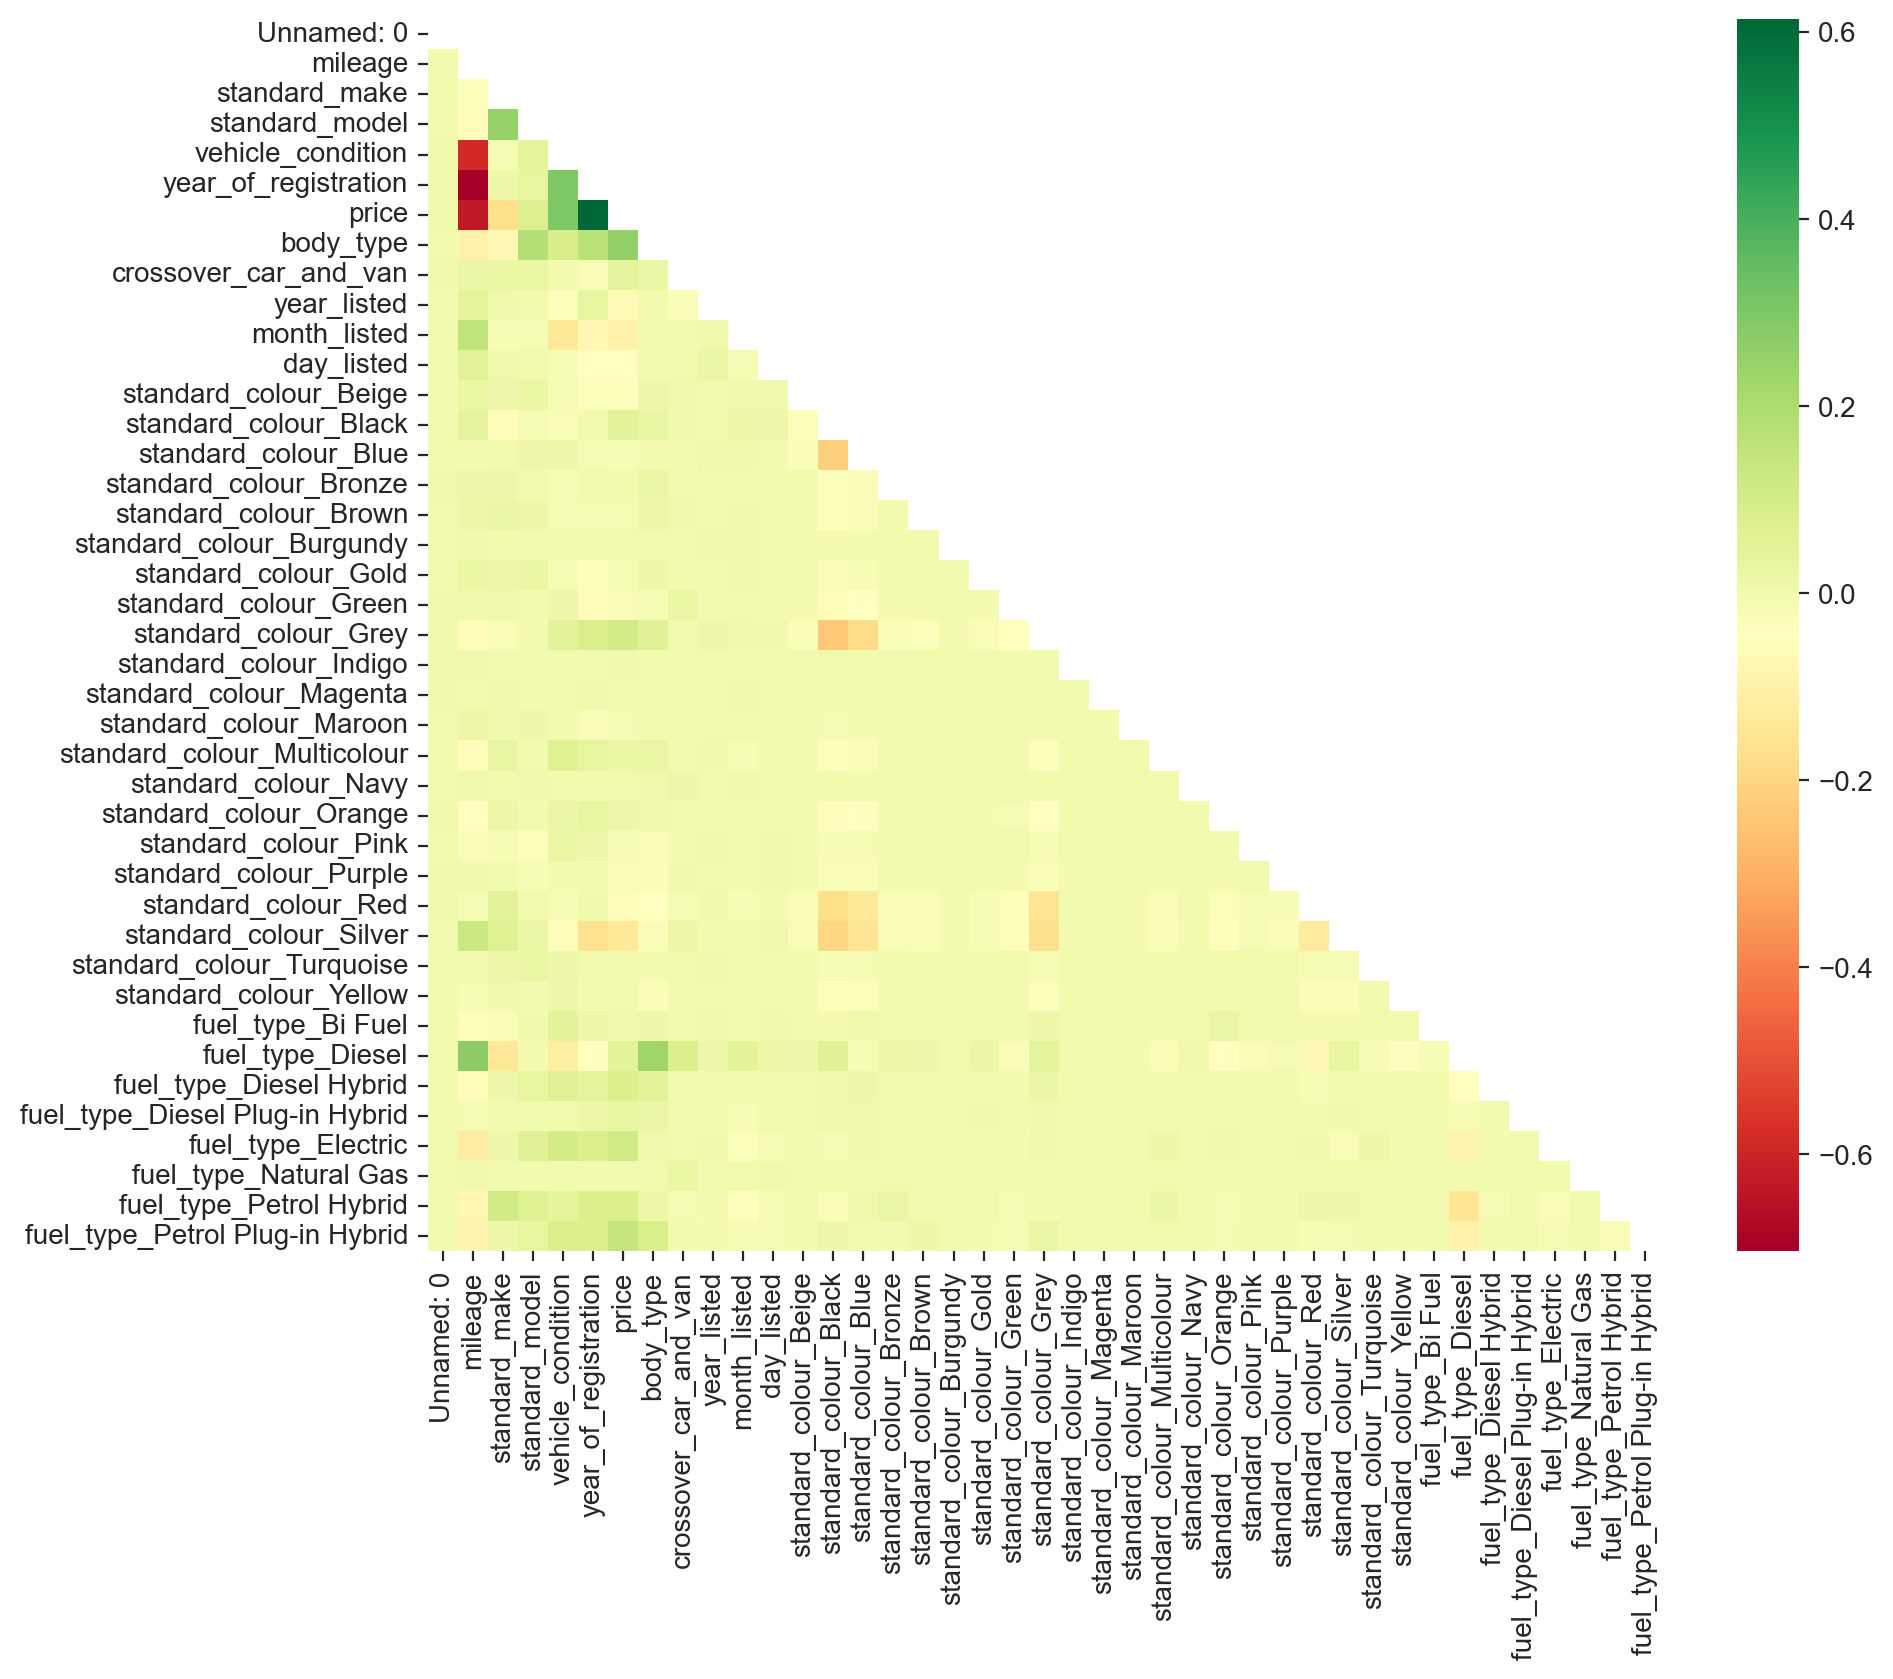

In [6]:
# Calculate the correlation matrix
corr_matrix = auto.corr()

# Create a mask to hide the upper triangle (including the diagonal) with the NumPy .triu function
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure and the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, mask=mask, square=True, annot=False, cmap='RdYlGn');

In [7]:
seed = 42

In [8]:
X, y = auto.drop(columns="price"), auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Cross validation

In [9]:
# Instantiate each of the models
logr = LogisticRegression()
knnr = KNeighborsRegressor()
rfr = RandomForestRegressor()

In [ ]:
models=[];
# models.append(('LOGR', LogisticRegression()))
models.append(("KNN", KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))

# Set a seed for reproducibility
np.random.seed(seed)

names=[];
result=[];
for name,model in models:
    k_fold=model_selection.KFold(n_splits=5, shuffle=True)
    score=model_selection.cross_val_score(knnr, X, y, cv=k_fold, scoring="accuracy");
    result.append(score)
    names.append(name)
    print(name,score.mean().round(3),score.std().round(3))

In [ ]:
sns.boxplot(result,labels=names)
plt.title('Comparison of Machine Learning Algorithms',fontsize=14)
plt.gca().set(ylabel='Model Score', xlabel='Model')
plt.show()